# Artificial and Computational Intelligence Assignment 1

## Problem solving by Uninformed & Informed Search

Things to follow
1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

Coding begins here

### 1.	Define the environment in the following block

List the PEAS decription of the problem here in this markdown block

<table style="width: 100%; border: 1px solid black; font-family: Arial, sans-serif;">
    <tr>
        <th style="border: 1px solid black; padding: 10px; background-color: #f2f2f2; text-align: left;">Performance</th>
        <td style="background-color: #fff; border: 1px solid black; padding: 10px;">Reaching the dirtiest spot with minimal energy consumption and perform intensive cleaning</td>
    </tr>
    <tr>
        <th style="border: 1px solid black; padding: 10px; background-color: #f2f2f2; text-align: left;">Environment</th>
        <td style="border: 1px solid black; padding: 10px;">
            - Dirt in different spots of a room specified in cells in the 2D grid layout<br/><br/>
            - Termination upon reaching local or global maximum
        </td>
    </tr>
    <tr>
        <th style="border: 1px solid black; padding: 10px; background-color: #f2f2f2; text-align: left;">Actuators</th>
        <td style="border: 1px solid black; padding: 10px;">Move Up, Move Down, Move Right, Move Left, NoOp</td>
    </tr>
    <tr>
        <th style="border: 1px solid black; padding: 10px; background-color: #f2f2f2; text-align: left;">Sensors</th>
        <td style="border: 1px solid black; padding: 10px;">Read the location of adjacent cells and detect dirt</td>
    </tr>
</table>

Design the agent as PSA Agent(Problem Solving Agent)
Clear Initial data structures to define the graph and variable declarations is expected
IMPORTATANT: Write distinct code block as below

In [ ]:
#Code Block : Set Initial State (Must handle dynamic inputs)

# used for mathematical operations
import math

# used for priority queue data structure needed for IDA* implementation
import heapq

# used to calculate elapsed time for benchmarking
import time

# grid list of lists which holds the amount of dirt given in the problem statement matrix
grid = [
    [0, 2, 5, 1],
    [3, 8, 6, 4],
    [1, 4, 9, 2],
    [0, 3, 5, 1]
]

# directions list holding tuples which are used to compute moving up, down, left and right
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

In [ ]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)

# cost function to get uniform cost of moving between adjacent cells
def get_cost(state1, state2):
    return 1

In [ ]:
#Code Block : Write function to design the Transition Model/Successor function. Ideally this would be called while search algorithms are implemented

"""
Finds all valid successor states (neighboring cells) for a given state in the grid.

Args:
    state (tuple): The current position in the grid as (x, y).
    grid (list of lists): The 2D grid representing the environment.

Returns:
    list: A list of valid successor states as (x, y) tuples.
"""
def get_successors(state, grid):
    x, y = state  # Extract the current position's coordinates.
    successors = []  # Initialize an empty list to store valid successors.

    # Iterate over all possible movement directions (UP, DOWN, LEFT, RIGHT).
    for dx, dy in directions:
        # Calculate the new position after applying the direction.
        nx, ny = x + dx, y + dy

        # Check if the new position (nx, ny) is within the grid's bounds.
        if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]):
            # If the position is valid, add it to the successors list.
            successors.append((nx, ny))

    # Return the list of all valid successor positions.
    return successors

In [ ]:
#Code block : Write fucntion to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented

"""
Checks if the given state is the goal state in the grid.

Args:
    state (tuple): The current position in the grid as (x, y).
    grid (list of lists): The 2D grid representing the environment.

Returns:
    bool: True if the current state is the goal state (has the maximum value in the grid),
          False otherwise.
"""
def is_goal(state, grid):
    # Find the maximum value in the entire grid.
    # The `max(row)` finds the maximum value in each row, and `max(max(row) for row in grid)`
    # finds the overall maximum value across all rows.
    max_val = max(max(row) for row in grid)

    # Check if the value at the current state's position matches the maximum value.
    # If the value at grid[state[0]][state[1]] equals max_val, return True, else return False.
    return grid[state[0]][state[1]] == max_val


### 2.	Definition of Algorithm 1 (Iterative Deepening A* Algorithm)

In [ ]:
#Code Block : Function for algorithm 1 implementation

"""
Performs Iterative Deepening A* (IDA*) search to find the shortest path to the goal state
(cell with the maximum value) in the given grid.

Args:
    grid (list of lists): The 2D grid representing the environment.
    start (tuple): The starting position in the grid as (x, y).

Returns:
    tuple: A tuple containing the path (list of tuples), cost (int), and final threshold (int).
            If no path is found, returns (None, None, None).
"""
def ida_star(grid, start):
    # Step 1: Find the goal state (the cell with the maximum value in the grid).
    goal = None
    max_val = float('-inf')  # Initialize maximum value to negative infinity.
    for i in range(len(grid)):  # Iterate through all rows.
        for j in range(len(grid[0])):  # Iterate through all columns in a row.
            if grid[i][j] > max_val:  # Check if the current cell's value is greater than max_val.
                max_val = grid[i][j]  # Update max_val to the current cell's value.
                goal = (i, j)  # Set the goal to the current cell's position.

    """
    Recursive function to perform depth-first search with a cost threshold.

    Args:
        path (list): The current path being explored.
        g (int): The current cost (distance traveled so far).
        threshold (int): The current cost threshold.

    Returns:
        int or list: The updated threshold if no solution is found, or the path if the goal is reached.
    """
    def search(path, g, threshold):
        current = path[-1]  # Get the current position from the end of the path.
        f = g + heuristic(current, goal)  # Calculate f(n) = g(n) + h(n).

        # If f exceeds the threshold, return f as the updated threshold.
        if f > threshold:
            return f

        # If the current position is the goal, return the path as the solution.
        if is_goal(current, grid):
            return path

        # Initialize the minimum threshold for the next iteration to infinity.
        min_threshold = math.inf

        # Explore all valid successor states (neighbors).
        for successor in get_successors(current, grid):
            if successor not in path:  # Avoid revisiting nodes in the current path.
                # Recursively search from the successor.
                result = search(path + [successor], g + get_cost(current, successor), threshold)
                if isinstance(result, list):  # If a path is found, return it.
                    return result
                min_threshold = min(min_threshold, result)  # Update the minimum threshold.

        return min_threshold  # Return the updated threshold for the next iteration.

    # Heuristic function: Manhattan distance between the current position and the goal.
    def heuristic(pos, goal):
        return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

    # Step 2: Initialize the threshold to the heuristic value of the start position.
    threshold = heuristic(start, goal)

    # Step 3: Iteratively deepen the search until a solution is found or no more paths exist.
    while True:
        result = search([start], 0, threshold)  # Start the search with the initial threshold.
        if isinstance(result, list):  # If a path is found, return the path, cost, and threshold.
            return result, len(result), threshold
        if result == math.inf:  # If no solution exists, return None for all outputs.
            return None, None, None
        threshold = result  # Update the threshold for the next iteration.


### 3.	Definition of Algorithm 2 (Hill Climbing Algorithm)

In [ ]:
#Code Block : Function for algorithm 2 implementation

"""
Performs the Hill Climbing algorithm to find the highest dirt value in a grid starting from a given position.

Args:
    grid (list of lists): The 2D grid representing the environment.
                          Each cell contains a numeric value indicating the amount of dirt.
    start (tuple): The starting position in the grid as (x, y).

Returns:
    tuple: A tuple containing:
        - path (list): The sequence of positions visited.
        - len(path) (int): The number of steps taken.
        - grid[current[0]][current[1]] (int): The dirt value at the final position (local maximum).
"""
def hill_climbing(grid, start):
    # Initialize the current position to the starting position.
    current = start

    # Initialize the path to include the starting position.
    path = [current]

    # Start the Hill Climbing process.
    while True:
        # Get all valid successors (neighbors) of the current position.
        successors = get_successors(current, grid)

        # Select the neighbor with the maximum dirt value.
        # If there are no successors, default to None.
        next_state = max(successors, key=lambda s: grid[s[0]][s[1]], default=None)

        # Check termination conditions:
        # 1. If there are no valid successors (next_state is None).
        # 2. If the best successor's value is not greater than the current cell's value.
        if next_state is None or grid[next_state[0]][next_state[1]] <= grid[current[0]][current[1]]:
            break  # Terminate the search (local maximum reached).

        # Move to the best successor (next_state) and add it to the path.
        current = next_state
        path.append(current)

    # Return the path, number of steps, and the dirt value at the final position.
    return path, len(path), grid[current[0]][current[1]]


### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question.

In [ ]:
#Code Block : Function & call to get inputs (start/end state)

"""
Prompts the user to enter a valid starting position within the grid.

Returns:
    tuple: A valid (row, column) start position entered by the user.
"""
def get_user_start_state():
    while True:  # Keep asking for input until a valid position is provided.
        try:
            # Prompt the user to enter the row index (integer).
            x = int(input("Enter the starting row index (0-3): "))

            # Prompt the user to enter the column index (integer).
            y = int(input("Enter the starting column index (0-3): "))

            # Check if the entered position is within the valid grid boundaries.
            if 0 <= x < len(grid) and 0 <= y < len(grid[0]):
                return (x, y)  # Return the valid position as a tuple.
            else:
                print("Invalid input. Please enter values within the grid range (0-3).")

        except ValueError:
            # Handle cases where the user enters a non-integer value.
            print("Invalid input. Please enter integers only.")

# Call the function to get the starting position from the user.
start = get_user_start_state()


Enter the starting row index (0-3): 0
Enter the starting column index (0-3): 0


### 4.	Calling the search algorithms
(For bidirectional search in below sections first part can be used as per Hint provided. Under second section other combinations as per Hint or your choice of 2 algorithms can be called .As an analyst suggest suitable approximation in the comparitive analysis section)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

"""
Though this is not part of the alorithm implementation, this function is
implemented to show the directed graph of the IDA* path.

Args:
    grid (list of list of int): 2D list representing the grid with cell values.
    path (list of tuple): List of tuples representing the optimal path through the grid.
    node_radius (float): Radius of the nodes, used to adjust arrow positioning for clarity.
"""
def draw_ida_star_graph(grid, path, node_radius=0.09):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes to the graph (representing each position in the grid)
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            G.add_node((i, j), value=grid[i][j])  # Each node represents a grid cell

    # Add edges representing possible moves (UP, DOWN, LEFT, RIGHT)
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            for dx, dy in directions:  # Iterate through valid movement directions
                ni, nj = i + dx, j + dy  # Compute new position
                if 0 <= ni < len(grid) and 0 <= nj < len(grid[0]):  # Ensure position is within bounds
                    G.add_edge((i, j), (ni, nj))  # Add a directed edge

    # Define node positions in a grid layout
    pos = {node: (node[1], -node[0]) for node in G.nodes()}  # Arrange in a proper grid

    # Draw the base graph in light gray (without arrows)
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightgray", edge_color="gray", font_size=10, arrows=False)

    # Highlight the selected path if found
    if path:
        # Only keep edges in the path
        path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]  # Forward edges only
        path_nodes = set(path)

        # Draw only forward-moving edges manually with arrows outside the nodes
        for edge in path_edges:
            start, end = edge
            start_pos = pos[start]
            end_pos = pos[end]

            # Compute offsets for the arrow to stay outside the nodes
            dx, dy = end_pos[0] - start_pos[0], end_pos[1] - start_pos[1]
            distance = (dx**2 + dy**2)**0.5
            offset_x = dx / distance * node_radius
            offset_y = dy / distance * node_radius

            # Adjusted start and end points
            adjusted_start = (start_pos[0] + offset_x, start_pos[1] + offset_y)
            adjusted_end = (end_pos[0] - offset_x, end_pos[1] - offset_y)

            # Add an arrow using Matplotlib annotations
            plt.annotate(
                "",
                xy=adjusted_end,  # End position outside the node
                xytext=adjusted_start,  # Start position outside the node
                arrowprops=dict(
                    arrowstyle="-|>",
                    color="red",
                    lw=2,
                ),
            )

        # Highlight visited nodes in green
        node_colors = ["green" if node in path_nodes else "lightgray" for node in G.nodes()]
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)

    # Show the graph
    plt.title("IDA* Directed Graph")
    plt.show()




IDA* Algorithm:
Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)]
Cost: 5
Threshold: 4
Execution Time: 0.000209 seconds


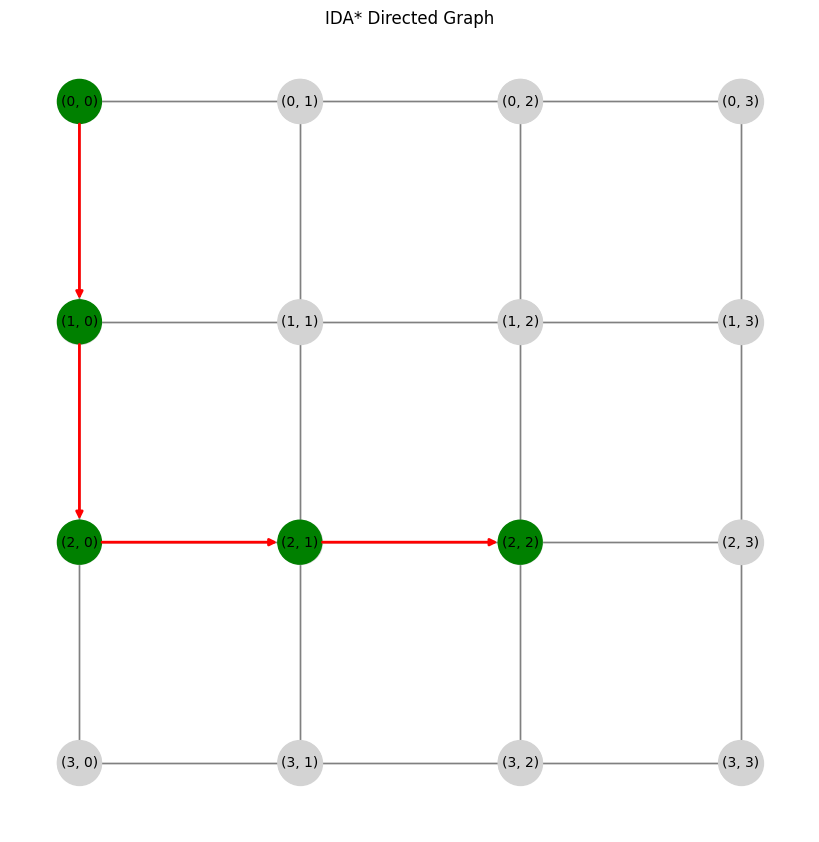

In [ ]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))
start_time = time.time()
ida_path, ida_cost, ida_threshold = ida_star(grid, start)
ida_time = time.time() - start_time

print("\nIDA* Algorithm:")
print("Path:", ida_path)
print("Cost:", ida_cost)
print("Threshold:", ida_threshold)
print(f"Execution Time: {ida_time:.6f} seconds")
draw_ida_star_graph(grid, ida_path)


In [ ]:
def draw_hill_climbing_line(fitness_landscape, path, grid_width):
    """
    Draws a line graph representing the fitness landscape with the Hill Climbing path.

    Args:
        fitness_landscape (list): 1D array representing the fitness values.
        path (list): List of tuples representing the path taken in the grid (row, column).
        grid_width (int): Number of columns in the grid to map 2D coordinates to 1D indices.
    """
    # Map (x, y) coordinates in the path to 1D indices
    path_indices = [x * grid_width + y for x, y in path]

    # Create x-axis values (indices of the fitness landscape)
    x = list(range(len(fitness_landscape)))

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the fitness landscape as a dashed blue line
    plt.plot(x, fitness_landscape, 'b--o', label="Fitness Landscape")

    # Extract the x and y values for the Hill Climbing path
    path_x = path_indices
    path_y = [fitness_landscape[i] for i in path_indices]

    # Plot the Hill Climbing path as a solid red line with circular markers
    plt.plot(path_x, path_y, 'r-o', label="Path Taken")

    # Mark the start and end positions on the path
    plt.scatter(path_x[0], path_y[0], color='green', s=100, label="Start Position")  # Start node in green
    plt.scatter(path_x[-1], path_y[-1], color='yellow', s=150, edgecolor='black', label="End Position")  # End node in yellow

    # Add title and labels
    plt.title("Fitness Landscape with Hill Climbing Path")
    plt.xlabel("State Index")
    plt.ylabel("Fitness Value")

    # Add grid, legend, and display the plot
    plt.grid(True)
    plt.legend()
    plt.show()



Hill Climbing Algorithm:
Path: [(0, 0), (1, 0), (1, 1)]
Cost: 3
Final Value: 8
Execution Time: 0.000161 seconds


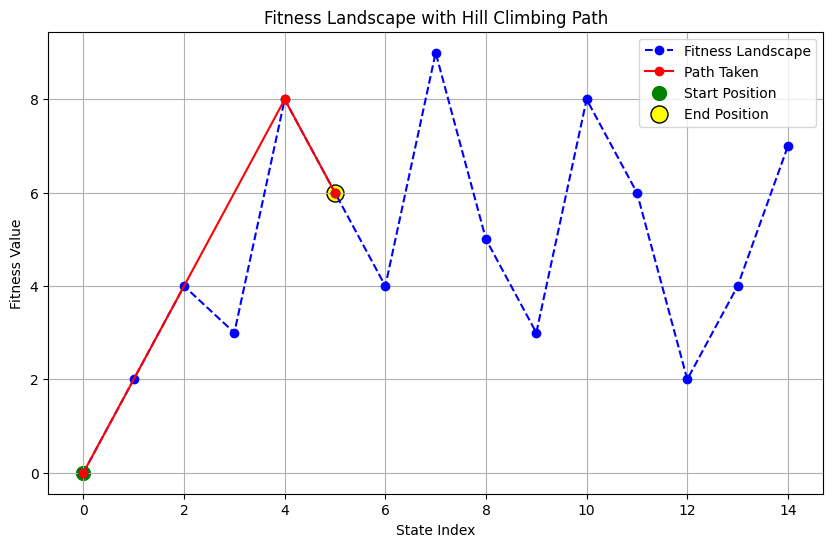

In [ ]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))

start_time = time.time()
hc_path, hc_cost, hc_value = hill_climbing(grid, start)
hc_time = time.time() - start_time

print("\nHill Climbing Algorithm:")
print("Path:", hc_path)
print("Cost:", hc_cost)
print("Final Value:", hc_value)
print(f"Execution Time: {hc_time:.6f} seconds")

# Example fitness landscape (1D array of fitness values)
fitness_landscape = [0, 2, 4, 3, 8, 6, 4, 9, 5, 3, 8, 6, 2, 4, 7]

# Grid details (for mapping (x, y) to 1D indices)
grid_width = len(grid[0])  # Number of columns in the grid

# Draw the Hill Climbing line graph
draw_hill_climbing_line(fitness_landscape, hc_path, grid_width)



### 5.	Comparitive Analysis (Time and Space Complexity)

In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 1

"""
Computes the average branching factor based on the number of successors at each step.

Args:
    grid (list of lists): The 2D environment grid.
    path (list): The path taken by the algorithm.

Returns:
    float: The average branching factor.
"""
def get_branching_factor(grid, path):
    total_successors = sum(len(get_successors(state, grid)) for state in path)
    return total_successors / len(path) if path else 1  # Avoid division by zero

"""
Runs the selected algorithm, computes actual branching factor and depth,
and prints the actual time and space complexity.

Args:
    start (tuple): The user's chosen starting position.
"""
def print_ida_complexity(start):
    # Run IDA* to get the path to the goal
    path, depth, _ = ida_star(grid, start)
    branching_factor = get_branching_factor(grid, path)

    print("\nTime & Space Complexity of Iterative Deepening A* Algorithm:")
    print(f"Branching Factor (b): {branching_factor:.2f}")
    print(f"Depth of Solution (d): {depth}")
    print(f"Time Complexity: O({branching_factor:.2f}^{depth}) ≈ {branching_factor ** depth:.2f} operations")
    print(f"Space Complexity: O({depth}) ≈ {depth} memory usage")

print("\nTime & Space Complexity of Iterative Deepening A* Algorithm (Algorithm 1):")
print("Time Complexity: O(b^d), Space Complexity: O(d)")
print_ida_complexity(start)


Time & Space Complexity of Iterative Deepening A* Algorithm (Algorithm 1):
Time Complexity: O(b^d), Space Complexity: O(d)

Time & Space Complexity of Iterative Deepening A* Algorithm:
Branching Factor (b): 3.20
Depth of Solution (d): 5
Time Complexity: O(3.20^5) ≈ 335.54 operations
Space Complexity: O(5) ≈ 5 memory usage


In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 2

"""
Runs the selected algorithm, computes actual branching factor and depth,
and prints the actual time and space complexity.

Args:
    start (tuple): The user's chosen starting position.
"""
def print_ha_complexity(start):
      # Run Hill Climbing to get the path to the local maximum
      path, depth, _ = hill_climbing(grid, start)
      branching_factor = get_branching_factor(grid, path)

      print("\nTime & Space Complexity of Hill Climbing Algorithm:")
      print(f"Branching Factor (b): {branching_factor:.2f}")
      print(f"Depth (d): {depth}")
      print(f"Time Complexity: O({branching_factor:.2f} * {depth}) ≈ {branching_factor * depth:.2f} operations")
      print(f"Space Complexity: O(1)")

print("\nTime & Space Complexity of Hill Climbing Algorithm (Algorithm 2):")
print("Time Complexity: O(b * d), Space Complexity: O(1)")
print_ha_complexity(start)


Time & Space Complexity of Hill Climbing Algorithm (Algorithm 2):
Time Complexity: O(b * d), Space Complexity: O(1)

Time & Space Complexity of Hill Climbing Algorithm:
Branching Factor (b): 3.00
Depth (d): 3
Time Complexity: O(3.00 * 3) ≈ 9.00 operations
Space Complexity: O(1)


### 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

Comparison : <ul><li>Iterative Deepening A* algorithm guarantees an optimal solution but is slower due to exhaustive exploration.</li><li>Hill Climbing is faster but may get stuck in local maxima.</li><li>If the optimal solution is the goal/criteria, then IDA* algorithm should be chosen. If efficiency is the goal/criteria, then hill climbing algorithm should be chosen.</li>